In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(50, 1)


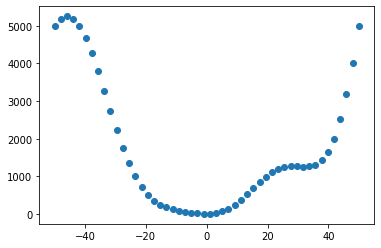

In [60]:
N = 50
L = 50
X = np.linspace(-L, L, N).reshape(N,1)
y = (np.sin(2*np.pi*X)+2)*X**2 + np.random.rand(N,1)

plt.scatter(X,y)
print(X.shape)

In [61]:
type(X)

numpy.ndarray

In [62]:
from sklearn import linear_model
model = linear_model.LinearRegression()
logreg = linear_model.LogisticRegression()
ridgeReg = linear_model.Ridge(alpha=1000)
model.fit(X, y)
#logreg.fit(X, y.ravel())
ridgeReg.fit(X, y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
y.ravel()

array([5.00094862e+03, 5.18448997e+03, 5.25181010e+03, 5.19072027e+03,
       4.99771700e+03, 4.68637616e+03, 4.27643228e+03, 3.79533287e+03,
       3.27386643e+03, 2.74294860e+03, 2.22971189e+03, 1.75805722e+03,
       1.34398796e+03, 9.96610301e+02, 7.20119489e+02, 5.08699809e+02,
       3.55879937e+02, 2.49193452e+02, 1.77459490e+02, 1.27882025e+02,
       9.21373647e+01, 6.29519766e+01, 3.69401076e+01, 1.61620735e+01,
       2.91074813e+00, 3.11172023e+00, 2.26156272e+01, 6.86059964e+01,
       1.42763218e+02, 2.46550280e+02, 3.76886800e+02, 5.27531827e+02,
       6.89404977e+02, 8.49365332e+02, 9.96044250e+02, 1.11836868e+03,
       1.20771444e+03, 1.26065572e+03, 1.27930842e+03, 1.27404910e+03,
       1.26060234e+03, 1.26254680e+03, 1.30823737e+03, 1.42635429e+03,
       1.64918668e+03, 2.00386274e+03, 2.51186622e+03, 3.18258719e+03,
       4.01695311e+03, 5.00092621e+03])

In [64]:
xplt = np.array([-L, L]).reshape(2, 1)
f_lin = model.predict(xplt)
#f_log = logreg.predict(xplt)
f_ridge = ridgeReg.predict(xplt)

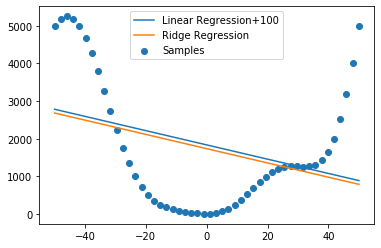

In [71]:
plt.scatter(X,y, label="Samples")
plt.plot(xplt,f_lin+100, label="Linear Regression+100")
plt.plot(xplt,f_lin, label="Ridge Regression")

plt.legend()

In [72]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X, y)
knn5.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
knn1.predict([[3, 5, 4, 2]])
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn1.predict(X_new)

array([2, 1])

In [75]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn5.predict(X_new)

array([1, 1])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
ridgeReg.fit(X_train, y_train)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
from sklearn import metrics

ridgeReg = linear_model.Ridge(alpha = 1)
ridgeReg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets